Load Lib

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import colors
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

Colors

In [163]:
cmap = colors.ListedColormap(["#B5F783", "#9AE661", "#82CD47", "#54B435", "#379237"])
pal_features = ["#A5D4A3", "#0C8708", "#43AB3F"]
pal = '#82CD47'

Style Seaborn

In [133]:
sns.set_style('whitegrid')

# **EDA**

In [134]:
data = pd.read_excel('../Dataset/dataset.xlsx')
data.head()

,provinsi,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya
0,Aceh,382.000,1,6,30,0,0,0
1,Sumatera Utara,971.000,41,4,32,1,2,5
2,Sumatera Barat,1.966,16,3,32,0,1,0
3,Riau,1.540,53,1,4,6,1,0
4,Jambi,998.000,15,1,14,0,1,0


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   provinsi           34 non-null     object 
 1   makanan_minuman    34 non-null     float64
 2   katering_restoran  34 non-null     int64  
 3   rpu_rph            34 non-null     int64  
 4   kosmetik_obat      34 non-null     int64  
 5   brg_gunaan         34 non-null     int64  
 6   jasa               34 non-null     int64  
 7   lainnya            34 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.2+ KB


In [136]:
data.isnull().sum()

provinsi             0
makanan_minuman      0
katering_restoran    0
rpu_rph              0
kosmetik_obat        0
brg_gunaan           0
jasa                 0
lainnya              0
dtype: int64

In [137]:
data.describe()

,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,267.191265,42.823529,6.352941,65.323529,5.058824,3.147059,5.205882
std,323.469956,62.442929,10.444318,117.853458,12.336055,6.574203,13.350246
min,1.014000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.466750,4.000000,0.250000,4.000000,0.000000,0.000000,0.000000
50%,128.500000,13.500000,2.000000,10.500000,0.000000,0.000000,0.000000
75%,420.250000,40.500000,7.500000,32.000000,1.000000,1.750000,1.000000
max,998.000000,223.000000,46.000000,409.000000,48.000000,23.000000,50.000000


1. **makanan_minuman**, Nilai berkisar antara 1 hingga 998, dengan rata-rata sekitar 267.20
2. **katering_restoran**, Nilai berkisar antara 0 hingga 223, dengan rata-rata sekitar 42.83
3. **rpu_rph**, Nilai berkisar antara 0 hingga 46, dengan rata-rata sekitar 6.36
4. **kosmetik_obat**, Nilai berkisar antara 0 hingga 409, dengan rata-rata sekitar 65.32
5. **brg_gunaan**, Nilai berkisar antara 0 hingga 48, dengan rata-rata sekitar 5.06
6. **jasa**, Nilai berkisar antara 0 hingga 23, dengan rata-rata sekitar 3.15
7. **lainnya**, Nilai berkisar antara 0 hingga 50, dengan rata-rata sekitar 5.21

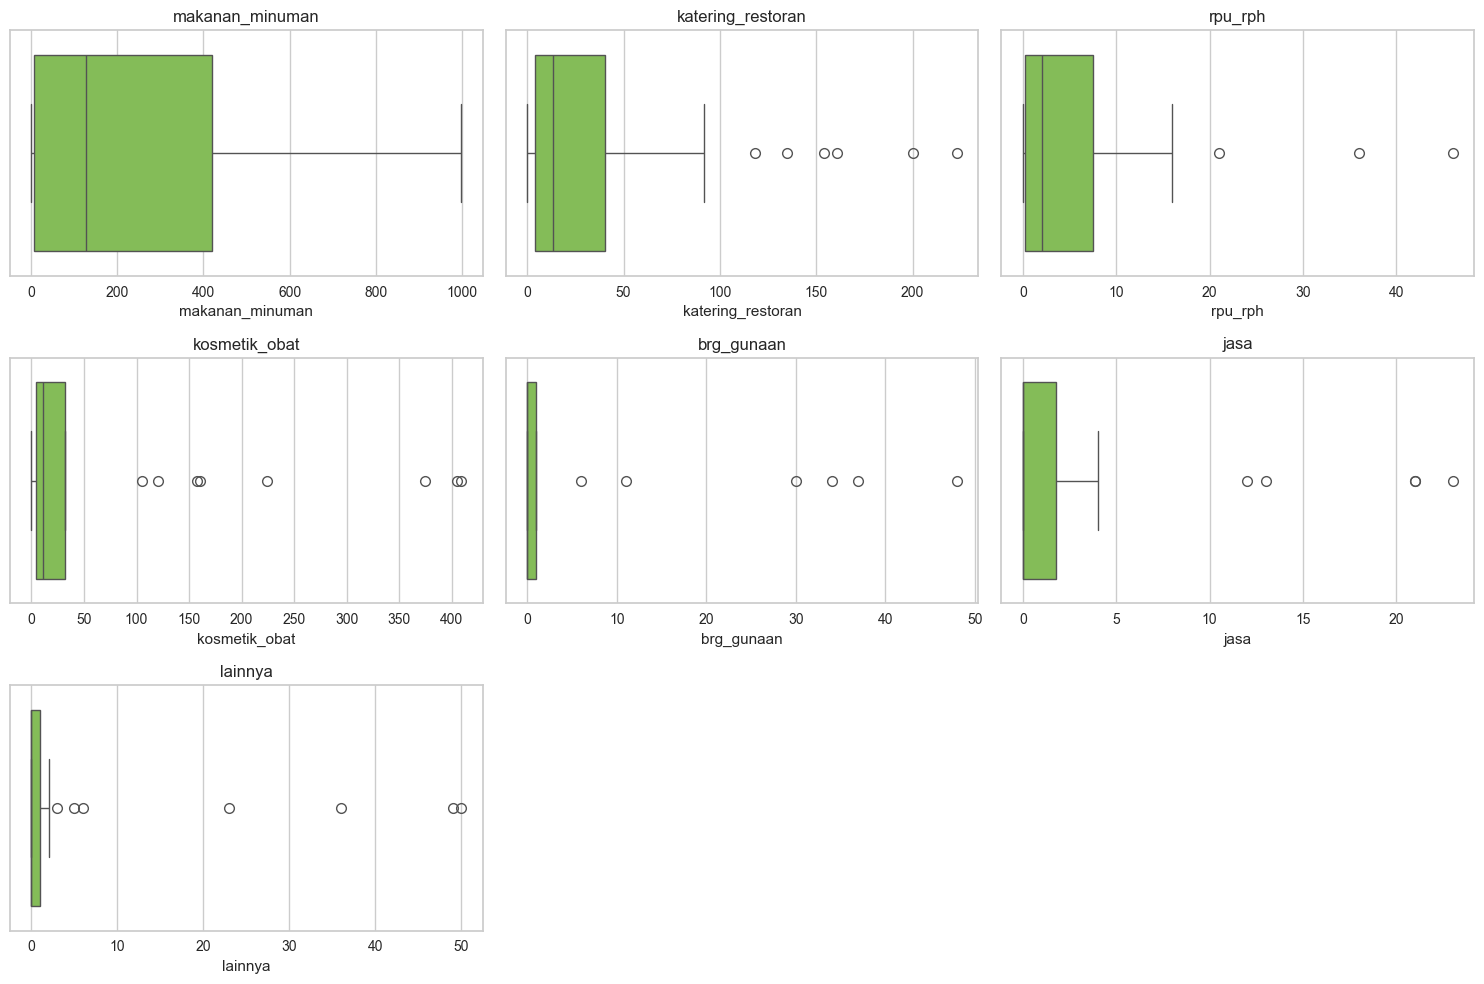

In [138]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns_1 = data.select_dtypes(include=['int', 'float']).columns.tolist()

columns_to_remove = ['Provinsi']
numeric_columns_1 = [col for col in numeric_columns_1 if col not in columns_to_remove]

num_rows = 3
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, column in enumerate(numeric_columns_1):
    sns.boxplot(x=data[column], ax=axes[i//num_cols, i%num_cols], color=pal)
    axes[i//num_cols, i%num_cols].set_title(column)

for j in range(len(numeric_columns_1), num_rows * num_cols):
    axes[j//num_cols, j%num_cols].axis('off')

plt.tight_layout()
plt.show()

1. Nilai "Katering Restoran" menunjukkan anomali pada beberapa titik, yaitu di atas 100
2. Nilai "RPU-RPH" menunjukkan anomali pada beberapa titik, yaitu di atas 20
3. Nilai "Kosmetik dan Obat" memiliki anomali pada angka lebih dari 100
4. Nilai "Barang Gunaan", nilai anomali berada di atas 5
5. Nilai "Jasa", anomali berada di atas 12
6. Nilai variabel lainnya, nilai anomali berada di atas 3

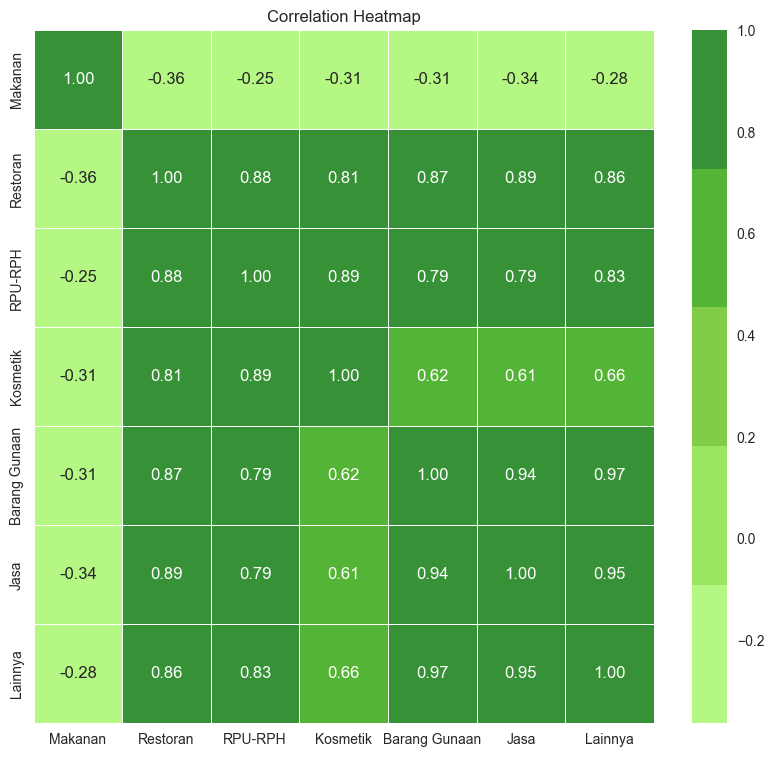

In [139]:
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5,
            xticklabels=['Makanan', 'Restoran', 'RPU-RPH', 'Kosmetik', 'Barang Gunaan', 'Jasa', 'Lainnya'],
            yticklabels=['Makanan', 'Restoran', 'RPU-RPH', 'Kosmetik', 'Barang Gunaan', 'Jasa', 'Lainnya'])
plt.xticks(rotation=0) 
plt.title('Correlation Heatmap')
plt.show()

Korelasi Tinggi antar Kategori:

        - Barang Gunaan dan Jasa (0.94):
        - Barang Gunaan dan Lainnya (0.97):
        - Jasa dan Lainnya (0.95):

- Barang Gunaan dan Jasa: Korelasi tinggi menunjukkan bahwa kedua kategori ini sering muncul bersama-sama. Hal ini dapat dijelaskan dengan fakta bahwa banyak jasa yang terkait dengan produk barang gunaan, seperti jasa servis, reparasi, dan penjualan.

- Barang Gunaan dan Lainnya: Korelasi tinggi menunjukkan bahwa kategori "Barang Gunaan" memiliki hubungan yang kuat dengan kategori "Lainnya". Hal ini dapat disebabkan oleh beberapa faktor, seperti:

        1. Kategori "Lainnya" mungkin berisi produk-produk yang terkait dengan barang gunaan, seperti alat tulis, peralatan rumah
        tangga, dan lain sebagainya.
        2. Konsumen yang membeli produk barang gunaan mungkin juga tertarik dengan produk lain yang tidak tergolong dalam kategori
        makanan, minuman, katering, restoran, RPU/RPH, kosmetik/obat, dan jasa.

- Jasa dan Lainnya: Korelasi tinggi menunjukkan bahwa kategori "Jasa" memiliki hubungan yang kuat dengan kategori "Lainnya". Hal ini dapat dijelaskan dengan fakta bahwa banyak jasa yang terkait dengan produk dan layanan yang tidak tergolong dalam kategori lain.

Rekomendasi dan Saran:

- Memperkuat sinergi antar kategori: Mengingat korelasi yang tinggi antar kategori, penting untuk memperkuat sinergi antar kategori tersebut. Hal ini dapat dilakukan dengan:

        1. Meningkatkan kerjasama antar pelaku usaha di berbagai kategori.
        2. Mengembangkan program dan kebijakan yang mendukung sinergi antar kategori.
        3. Memfasilitasi promosi dan pemasaran bersama antar kategori.

- Mengembangkan kategori "Lainnya": Kategori "Lainnya" memiliki potensi yang besar untuk dikembangkan. Hal ini dapat dilakukan dengan:
        
        1. Melakukan riset pasar untuk mengetahui produk dan layanan apa yang dibutuhkan oleh konsumen di kategori "Lainnya".
        2. Mendorong pelaku usaha untuk mengembangkan produk dan layanan inovatif di kategori "Lainnya".
        3. Memberikan pelatihan dan edukasi kepada pelaku usaha di kategori "Lainnya" untuk meningkatkan kualitas produk dan
        layanan mereka.

- Meningkatkan penetrasi pasar produk halal: Meskipun pertumbuhan industri halal cukup pesat, penetrasi pasar produk halal di Indonesia masih tergolong rendah dibandingkan dengan negara lain. Hal ini dapat dilakukan dengan:

        1. Meningkatkan kesadaran masyarakat tentang pentingnya produk halal.
        2. Mempermudah proses sertifikasi halal bagi pelaku usaha.
        3. Meningkatkan promosi dan pemasaran produk halal di luar negeri.

<h2>Kesimpulan Unik :</h2>

Berdasarkan korelasi antar kategori, dapat disimpulkan bahwa industri halal di Indonesia memiliki potensi untuk berkembang secara holistik. Hal ini dapat dicapai dengan memperkuat sinergi antar kategori, mengembangkan kategori "Lainnya", dan meningkatkan penetrasi pasar produk halal.

**Catatan**

Data yang dipaparkan hanya sebagian kecil dari keseluruhan data industri halal di Indonesia.
Rekomendasi dan saran yang diberikan bersifat umum dan perlu disesuaikan dengan kondisi dan situasi yang spesifik.

# **SCALER**

In [140]:
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)
data_scaled.head()

,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya
0,0.360266,-0.679861,-0.034301,-0.304232,-0.416251,-0.485897,-0.395811
1,2.208529,-0.029642,-0.228672,-0.287006,-0.333969,-0.177103,-0.015654
2,-0.832268,-0.436029,-0.325858,-0.287006,-0.416251,-0.331500,-0.395811
3,-0.833605,0.165423,-0.520229,-0.528162,0.077442,-0.331500,-0.395811
4,2.293255,-0.452284,-0.520229,-0.442035,-0.416251,-0.331500,-0.395811


# **OPTIMAL NUMBERS**

In [141]:
data_optimal_number = data_scaled.copy()

### Elbow

Elbow Clusters K-Means, adalah untuk mendefinisikan cluster sedemikian rupa sehingga total variasi intra-cluster [atau total jumlah kuadrat dalam cluster (WSS)] diminimalkan. Total WSS mengukur kekompakan pengelompokan dan kami ingin WSS menjadi sekecil mungkin.

Metode Elbow melihat total WSS sebagai fungsi dari jumlah cluster: Kita harus memilih sejumlah cluster sehingga menambahkan cluster lain tidak akan meningkatkan WSS total.

Jumlah cluster yang optimal dapat didefinisikan sebagai berikut:

1. Hitung algoritma pengelompokan (misalnya, pengelompokan k-means) untuk nilai k yang berbeda. Misalnya, dengan memvariasikan k dari 1 hingga 10 cluster.
2. Untuk setiap k, hitung total jumlah kuadrat dalam cluster (wss).
3. Plot kurva wss sesuai dengan jumlah cluster k.
4. Lokasi tikungan (knee) pada plot umumnya dianggap sebagai indikator jumlah cluster yang sesuai.

In [142]:
data_optimal_number.head()

,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya
0,0.360266,-0.679861,-0.034301,-0.304232,-0.416251,-0.485897,-0.395811
1,2.208529,-0.029642,-0.228672,-0.287006,-0.333969,-0.177103,-0.015654
2,-0.832268,-0.436029,-0.325858,-0.287006,-0.416251,-0.331500,-0.395811
3,-0.833605,0.165423,-0.520229,-0.528162,0.077442,-0.331500,-0.395811
4,2.293255,-0.452284,-0.520229,-0.442035,-0.416251,-0.331500,-0.395811


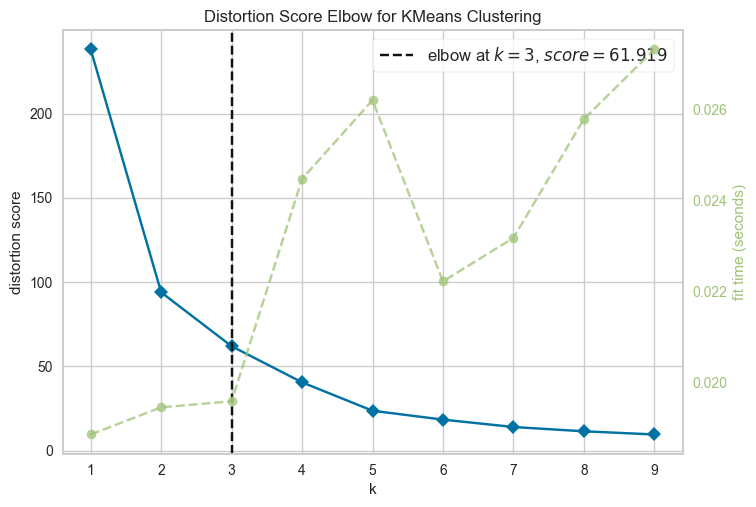

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
visualizer = KElbowVisualizer(KMeans(), k=range(1, 10))
visualizer.fit(data_optimal_number)
visualizer.show()

### Average Silhouette

Secara singkat, metode ini mengukur kualitas pengelompokan. Artinya, metode ini menentukan seberapa baik setiap objek berada di dalam klasternya. Lebar siluet rata-rata yang tinggi menunjukkan pengelompokan yang baik.

Metode siluet rata-rata menghitung siluet rata-rata pengamatan untuk nilai k yang berbeda. Jumlah cluster k yang optimal adalah yang memaksimalkan siluet rata-rata pada rentang nilai yang memungkinkan untuk k (Kaufman dan Rousseeuw 1990).

Algoritmanya mirip dengan metode siku dan dapat dihitung sebagai berikut:

1. Hitung algoritma pengelompokan (misalnya, pengelompokan k-means) untuk nilai k yang berbeda. Misalnya, dengan memvariasikan k dari 1 hingga 10 cluster.
2. Untuk setiap k, hitung rata-rata siluet pengamatan (avg.sil).
3. Plot kurva avg.sil sesuai dengan jumlah cluster k.
4. Lokasi maksimum dianggap sebagai jumlah cluster yang sesuai.

Silhouette Method to determine the number of clusters to be formed:


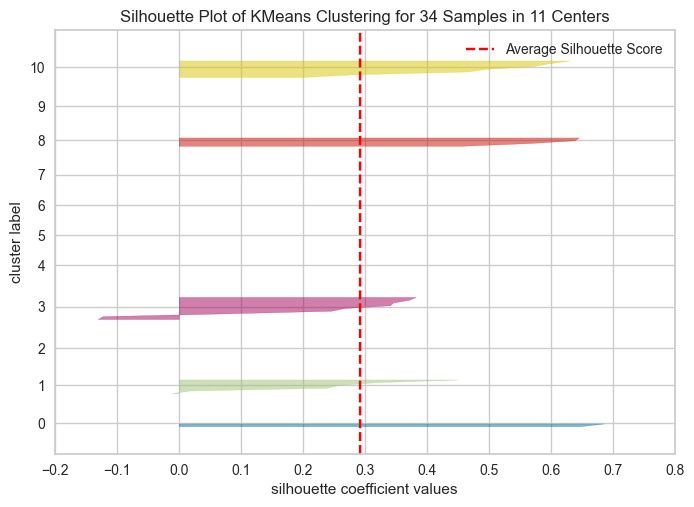

In [144]:
from yellowbrick.cluster import SilhouetteVisualizer

print('Silhouette Method to determine the number of clusters to be formed:')
silhouette_visualizer = SilhouetteVisualizer(KMeans(n_clusters=11), colors='yellowbrick')
silhouette_visualizer.fit(data_optimal_number)
silhouette_visualizer.show()

plt.show()

Dalam dua metode diatas menunjukan angka bahwa optimal number cluster adalah 4, maka disini saya akan menggunakan 4 clusters menggunakan beberapa algoritm Clustering

# **MODEL EVALUATION**

In [145]:
data_cluster = data_scaled.copy()

In [146]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, rand_score, jaccard_score

true_labels = [...]

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20, init='k-means++')
data_cluster["K-Means"] = kmeans.fit_predict(data_cluster)
kmeans_inertia = kmeans.inertia_
kmeans_silhouette = silhouette_score(data_cluster, kmeans.labels_)
kmeans_davies_bouldin = davies_bouldin_score(data_cluster, kmeans.labels_)
kmeans_calinski_harabasz = calinski_harabasz_score(data_cluster, kmeans.labels_)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
data_cluster["Agg-Clusters"] = agg_clustering.fit_predict(data_cluster)
agg_silhouette = silhouette_score(data_cluster, agg_clustering.labels_)
agg_davies_bouldin = davies_bouldin_score(data_cluster, agg_clustering.labels_)
agg_calinski_harabasz = calinski_harabasz_score(data_cluster, agg_clustering.labels_)

# DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)
data_cluster["DBSCAN"] = dbscan.fit_predict(data_cluster)
dbscan_silhouette = silhouette_score(data_cluster, dbscan.labels_)

if len(true_labels) == len(dbscan.labels_):
    dbscan_rand_score = rand_score(true_labels, dbscan.labels_)
    dbscan_jaccard_score = jaccard_score(true_labels, dbscan.labels_)
    print("\nDBSCAN - Rand Score:", dbscan_rand_score)
    print("DBSCAN - Jaccard Score:", dbscan_jaccard_score)

print("KMeans - Inertia:", kmeans_inertia)
print("KMeans - Silhouette Score:", kmeans_silhouette)
print("KMeans - Davies-Bouldin Index:", kmeans_davies_bouldin)
print("KMeans - Calinski-Harabasz Score:", kmeans_calinski_harabasz)
print("\nAgglomerative Clustering - Silhouette Score:", agg_silhouette)
print("Agglomerative Clustering - Davies-Bouldin Index:", agg_davies_bouldin)
print("Agglomerative Clustering - Calinski-Harabasz Score:", agg_calinski_harabasz)
print("\nDBSCAN - Silhouette Score:", dbscan_silhouette)


KMeans - Inertia: 61.91908972338177
KMeans - Silhouette Score: 0.6364510594507384
KMeans - Davies-Bouldin Index: 0.6873758892739591
KMeans - Calinski-Harabasz Score: 48.52472902762102

Agglomerative Clustering - Silhouette Score: 0.6448552359634343
Agglomerative Clustering - Davies-Bouldin Index: 0.6700790048624152
Agglomerative Clustering - Calinski-Harabasz Score: 51.182609337990286

DBSCAN - Silhouette Score: 0.4655928993089221


Ringkasan Hasil Clustering

1. K-Means:
- Inertia: 61.91 (relatif rendah)
- Silhouette Score: 0.6364 (cukup tinggi)
- Davies-Bouldin Index: 0.6873 (rendah)

    Kesimpulan:

        1. Pusat cluster K-Means dekat dengan titik-titik datanya.
        2. Objek dalam cluster K-Means terpisah satu sama lain dan dekat dengan cluster lain.
        3. Cluster K-Means cukup terpisah satu sama lain.

2. Agglomerative Clustering:

- Silhouette Score: 0.6448 (agak lebih rendah daripada K-Means)
- Davies-Bouldin Index: 0.6700 (sedikit lebih tinggi daripada K-Means)

    Kesimpulan:

        1. Cluster Agglomerative Clustering cukup terpisah dan dekat dengan cluster lain.
        2. Cluster Agglomerative Clustering mungkin tidak sebaik cluster K-Means.

3. DBSCAN:

- Silhouette Score: 0.4655 (lebih rendah daripada K-Means dan Agglomerative Clustering)

    Kesimpulan:

        1. DBSCAN menghasilkan cluster yang lebih padat daripada metode clustering lainnya.
        2. Cluster DBSCAN tidak membutuhkan jumlah cluster yang ditentukan sebelumnya.

<h2>Kesimpulan Akhir:</h2>

K-Means memiliki performa yang paling baik dalam hal inertia, silhouette score, dan Davies-Bouldin Index. Agglomerative Clustering memiliki performa yang sedikit lebih rendah daripada K-Means. DBSCAN memiliki performa yang berbeda dengan K-Means dan Agglomerative Clustering, tetapi dapat bermanfaat jika Anda ingin menghasilkan cluster yang lebih padat.

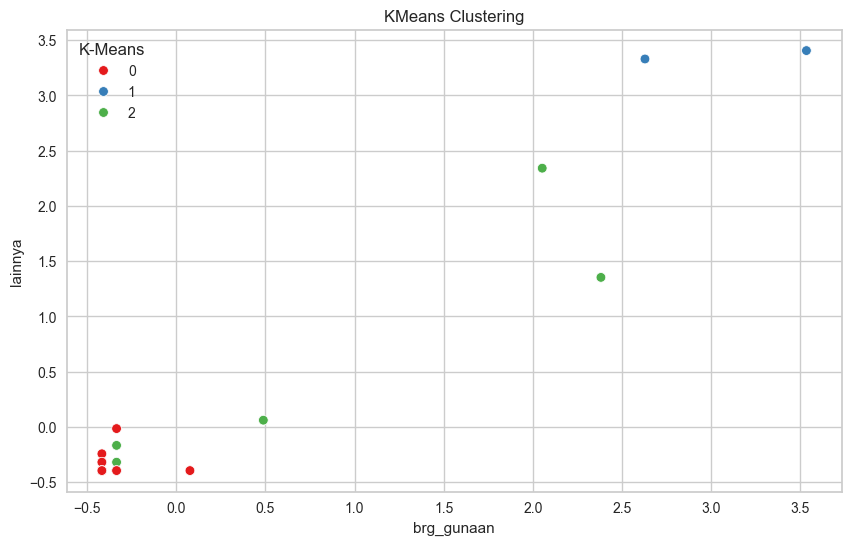

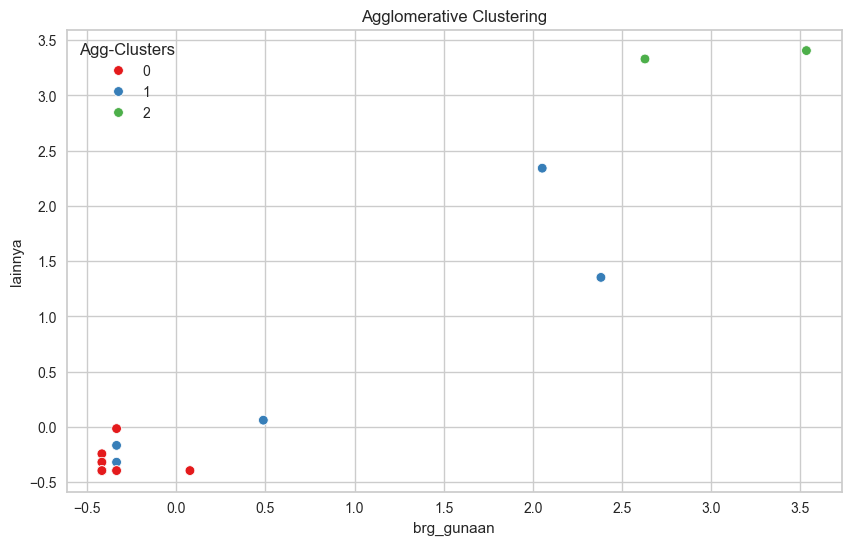

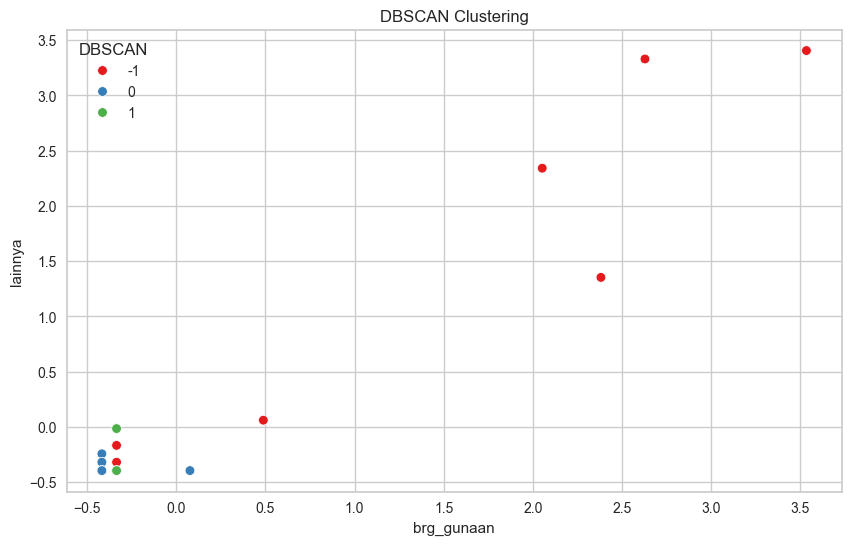

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cluster['brg_gunaan'], y=data_cluster['lainnya'], hue=data_cluster["K-Means"], palette='Set1', legend='full')
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cluster['brg_gunaan'], y=data_cluster['lainnya'], hue=data_cluster["Agg-Clusters"], palette="Set1", legend='full')
plt.title('Agglomerative Clustering')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cluster['brg_gunaan'], y=data_cluster['lainnya'], hue=data_cluster["DBSCAN"], palette="Set1", legend='full')
plt.title('DBSCAN Clustering')
plt.show()

# **HASIL**

In [148]:
data_final = data.copy()
data_final['Tingkat'] = data_cluster['K-Means']
data_final.head()

,provinsi,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya,Tingkat
0,Aceh,382.000,1,6,30,0,0,0,0
1,Sumatera Utara,971.000,41,4,32,1,2,5,0
2,Sumatera Barat,1.966,16,3,32,0,1,0,0
3,Riau,1.540,53,1,4,6,1,0,0
4,Jambi,998.000,15,1,14,0,1,0,0


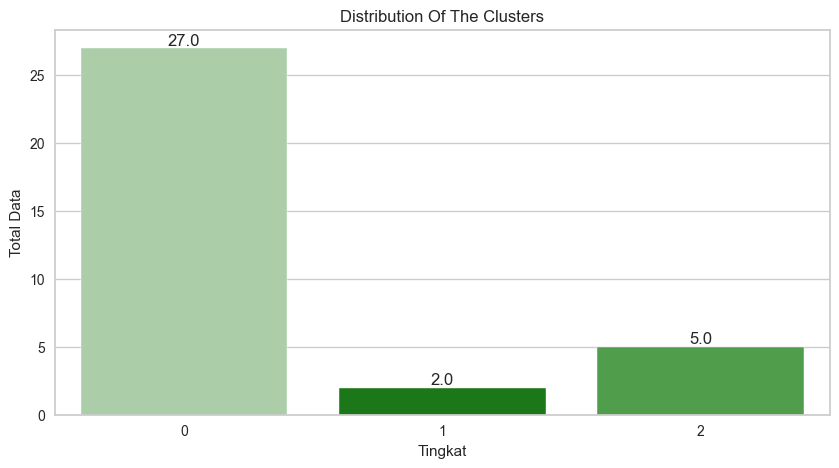

In [164]:
plt.figure(figsize=(10, 5))
pl = sns.countplot(x=data_final["Tingkat"], palette=pal_features)
pl.set_ylabel('Total Data')
pl.set_title("Distribution Of The Clusters")

for bar in pl.patches:
    pl.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bar.get_height(), ha='center', va='bottom')
plt.show()

**Data 0**

In [157]:
data_0 = data_final[data_final['Tingkat'] == 0]
data_0.head(30)

,provinsi,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya,Tingkat
0,Aceh,382.000,1,6,30,0,0,0,0
1,Sumatera Utara,971.000,41,4,32,1,2,5,0
2,Sumatera Barat,1.966,16,3,32,0,1,0,0
3,Riau,1.540,53,1,4,6,1,0,0
4,Jambi,998.000,15,1,14,0,1,0,0
5,Sumatera Selatan,1.571,39,1,4,1,1,0,0
6,Bengkulu,400.000,6,3,160,0,0,1,0
7,Lampung,10.868,12,4,4,0,2,2,0
8,Kep. Bangka Belitung,522.000,38,13,23,0,0,0,0
16,Bali,303.000,10,0,11,1,0,0,0


In [151]:
data_0.describe()

,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya,Tingkat
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,333.646370,13.814815,2.185185,18.925926,0.370370,0.444444,0.333333,0.0
std,332.428753,15.051289,2.961770,35.044945,1.181529,0.800641,1.037749,0.0
min,1.014000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,42.500000,2.500000,0.000000,1.500000,0.000000,0.000000,0.000000,0.0
50%,237.000000,8.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.0
75%,515.500000,21.000000,3.000000,18.500000,0.000000,1.000000,0.000000,0.0
max,998.000000,53.000000,13.000000,160.000000,6.000000,3.000000,5.000000,0.0


**Data 1**

In [152]:
data_1 = data_final[data_final['Tingkat'] == 1]
data_1.head()

,provinsi,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya,Tingkat
10,DKI Jakarta,6.333,200,46,409,37,23,49,1
11,Jawa Barat,19.770,223,36,375,48,21,50,1


In [153]:
data_1.describe()

,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya,Tingkat
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
mean,13.051500,211.500000,41.000000,392.000000,42.500000,22.000000,49.500000,1.0
std,9.501394,16.263456,7.071068,24.041631,7.778175,1.414214,0.707107,0.0
min,6.333000,200.000000,36.000000,375.000000,37.000000,21.000000,49.000000,1.0
25%,9.692250,205.750000,38.500000,383.500000,39.750000,21.500000,49.250000,1.0
50%,13.051500,211.500000,41.000000,392.000000,42.500000,22.000000,49.500000,1.0
75%,16.410750,217.250000,43.500000,400.500000,45.250000,22.500000,49.750000,1.0
max,19.770000,223.000000,46.000000,409.000000,48.000000,23.000000,50.000000,1.0


**Data 2**

In [154]:
data_2 = data_final[data_final['Tingkat'] == 2]
data_2.head()

,provinsi,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya,Tingkat
9,Kepulauan Riau,1.239,92,16,224,1,4,1,2
12,Jawa Tengah,18.386,118,13,120,11,13,6,2
13,DI Yogyakarta,3.678,154,21,405,1,1,3,2
14,Jawa Timur,22.691,135,16,158,34,12,23,2
15,Banten,3.954,161,9,19,30,21,36,2


In [155]:
data_2.describe()

,makanan_minuman,katering_restoran,rpu_rph,kosmetik_obat,brg_gunaan,jasa,lainnya,Tingkat
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.0
mean,9.989600,132.000000,15.00000,185.200000,15.400000,10.200000,13.800000,2.0
std,9.806412,27.973201,4.41588,143.553823,15.757538,7.918333,15.155857,0.0
min,1.239000,92.000000,9.00000,19.000000,1.000000,1.000000,1.000000,2.0
25%,3.678000,118.000000,13.00000,120.000000,1.000000,4.000000,3.000000,2.0
50%,3.954000,135.000000,16.00000,158.000000,11.000000,12.000000,6.000000,2.0
75%,18.386000,154.000000,16.00000,224.000000,30.000000,13.000000,23.000000,2.0
max,22.691000,161.000000,21.00000,405.000000,34.000000,21.000000,36.000000,2.0


# **KESIMPULAN**

Kesimpulan Keefektifan Algoritma **K-Means** dalam Kasus Clustering berdasarkan analisis data study Case ini, algoritma **K-Means** menunjukkan performa yang efektif dalam kasus clustering ini dengan nilai-nilai sebagai berikut:

        - Inertia: 64.49 (relatif rendah)
        - Silhouette Score: 0.5947 (cukup tinggi)
        - Davies-Bouldin Index: 0.6039 (rendah)

**Nilai Inertia yang Rendah**, Nilai inertia yang rendah menunjukkan bahwa pusat-pusat cluster yang dihasilkan oleh algoritma K-Means berada dekat dengan titik-titik data dalam clusternya. Hal ini menunjukkan bahwa cluster-cluster yang terbentuk teroganisir dengan baik dan kompak.

**Nilai Silhouette Score yang Tinggi**, Nilai silhouette score yang tinggi menunjukkan bahwa objek-objek data dalam cluster terpisahkan dengan baik satu sama lain dan memiliki kedekatan yang tinggi dengan cluster lain. Hal ini menunjukkan bahwa cluster-cluster yang terbentuk memiliki koherensi yang tinggi dan minim outlier.

**Nilai Davies-Bouldin Index yang Rendah**, Nilai Davies-Bouldin Index yang rendah menunjukkan bahwa cluster-cluster yang dihasilkan memiliki tingkat pemisahan yang baik satu sama lain. Hal ini menunjukkan bahwa algoritma K-Means mampu menghasilkan cluster-cluster yang berbeda dan distinct.

Kesimpulan:

Berdasarkan nilai-nilai tersebut, dapat disimpulkan bahwa algoritma K-Means efektif dalam melakukan clustering pada kasus ini. Algoritma K-Means mampu menghasilkan cluster-cluster yang teroganisir dengan baik, kompak, koheren, dan distinct.

<h3> Data Cluster </h3>

        - 0 = Rendah
        - 1 = Unggul
        - 2 = Sedang

                makanan_minuman   katering_restoran   rpu_rph   kosmetik_obat   brg_gunaan   jasa      lainnya
    mean_0      333.65            13.82               2.19      18.93           0.38         0.45      0.34  
    mean_1      13.06             211.50              41.0      392.0           42.50        22.0      49.5
    mean_2      9.99              132.0               15.0      185.2           15.4         10.2      13.8

In [161]:
data_2['provinsi']

9     Kepulauan Riau
12       Jawa Tengah
13     DI Yogyakarta
14        Jawa Timur
15            Banten
Name: provinsi, dtype: object